### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

### Checking Dataset

In [2]:
df=pd.read_csv("churning_data.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Removing Missing Values

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df = df[~np.isnan(df['TotalCharges'])]

In [8]:
df.isnull().sum()*100/df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visualizing Dataset

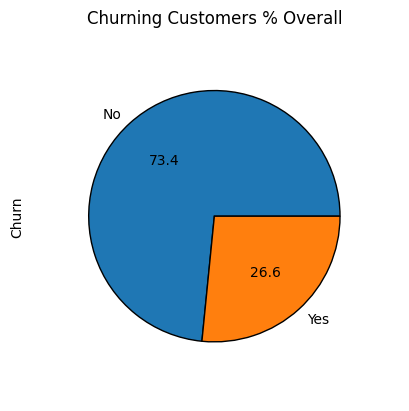

In [10]:
pie_d=df['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % Overall", autopct='%1.1f', radius=0.85, wedgeprops={'edgecolor': 'black'})
plt.show()

([<matplotlib.axis.XTick at 0x2062a8d1850>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

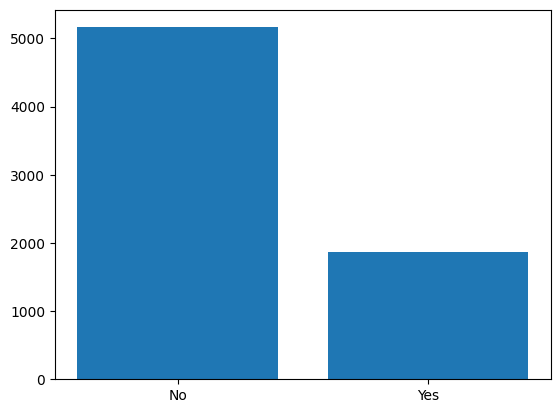

In [11]:
plt.bar(x=range(len(pie_d)), height=pie_d)
plt.xticks(range(len(pie_d)), pie_d.index)

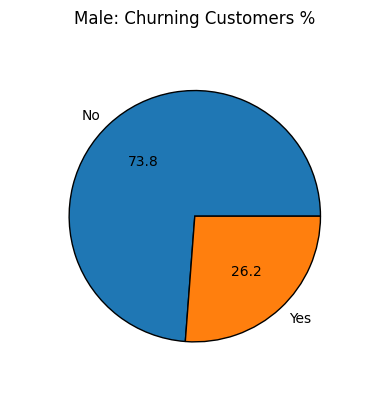

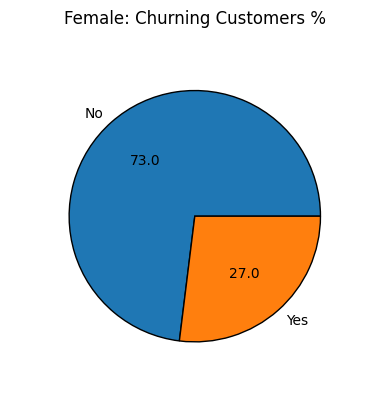

In [12]:
filter=df['gender']=='Male'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Male: Churning Customers %", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['gender']=='Female'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Female: Churning Customers %", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

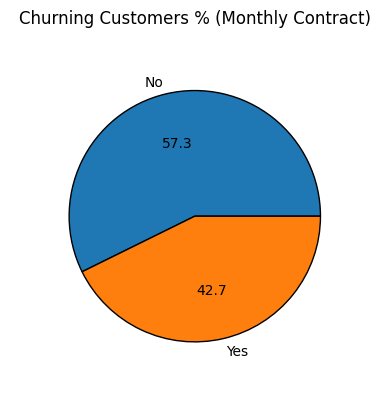

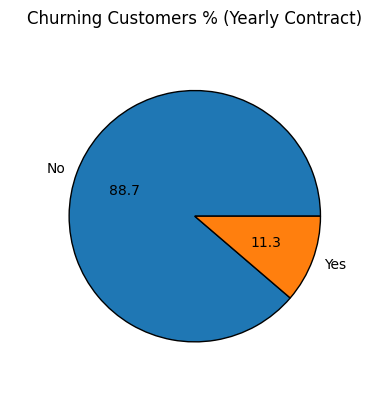

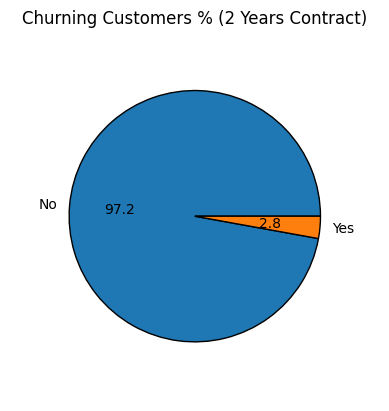

In [13]:
filter=df['Contract']=='Month-to-month'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Monthly Contract)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['Contract']=='One year'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Yearly Contract)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['Contract']=='Two year'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (2 Years Contract)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

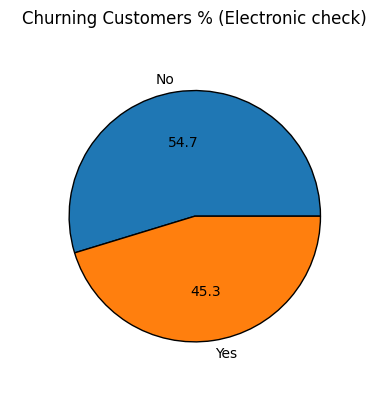

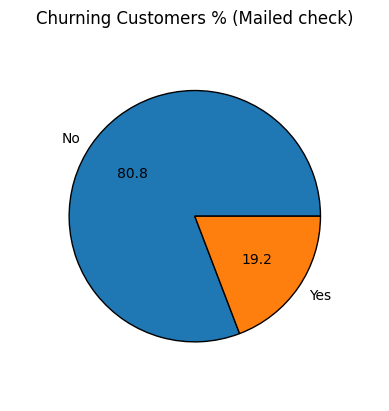

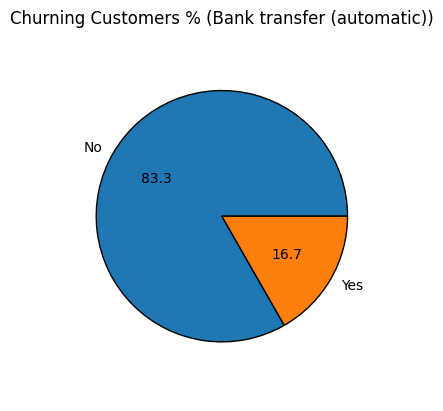

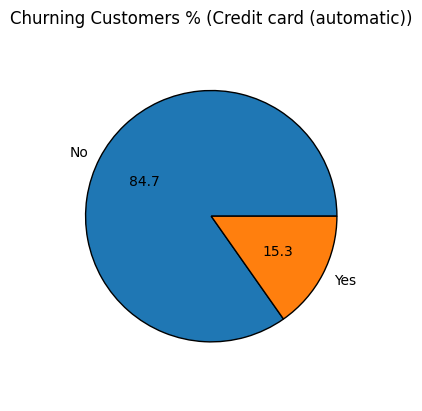

In [14]:
filter=df['PaymentMethod']=='Electronic check'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Electronic check)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['PaymentMethod']=='Mailed check'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Mailed check)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['PaymentMethod']=='Bank transfer (automatic)'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Bank transfer (automatic))", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['PaymentMethod']=='Credit card (automatic)'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Credit card (automatic))", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

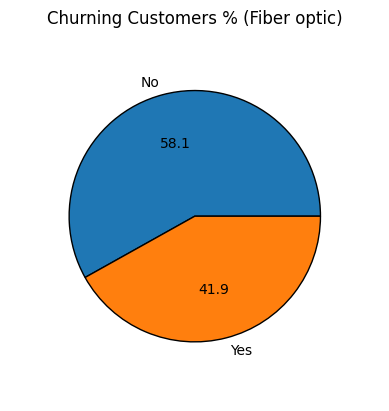

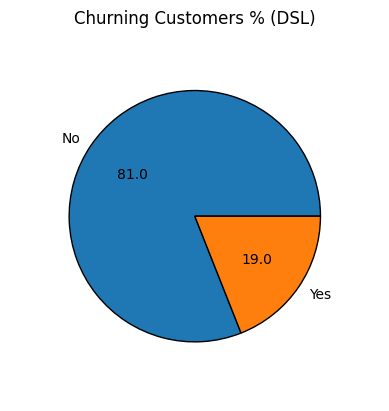

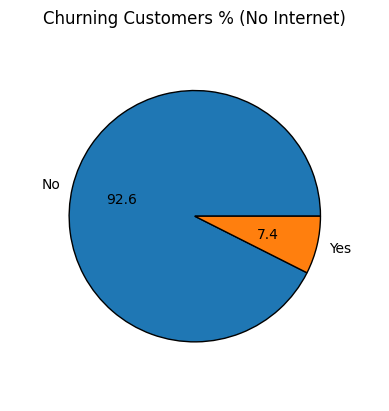

In [15]:
filter=df['InternetService']=='Fiber optic'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Fiber optic)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['InternetService']=='DSL'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (DSL)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['InternetService']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Internet)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

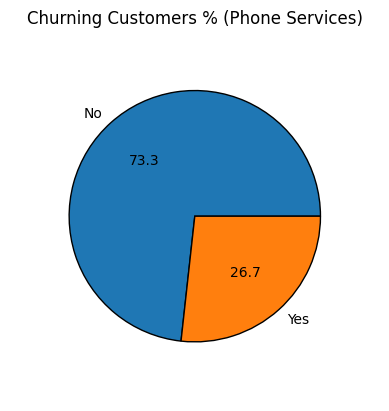

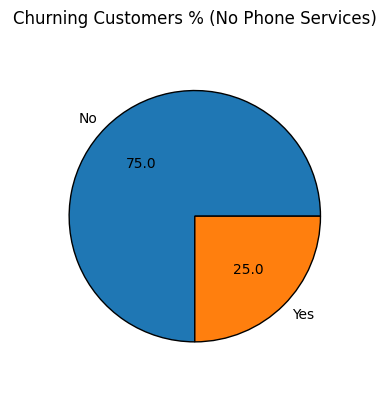

In [16]:
filter=df['PhoneService']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Phone Services)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['PhoneService']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Phone Services)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

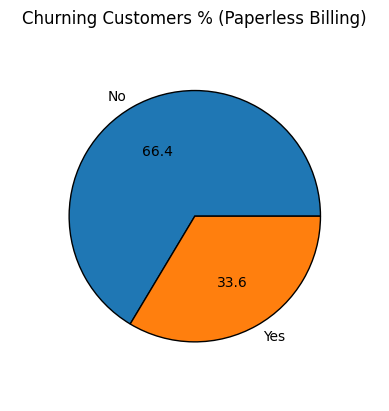

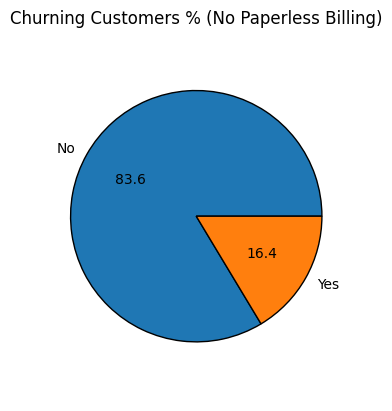

In [17]:
filter=df['PaperlessBilling']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Paperless Billing)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['PaperlessBilling']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Paperless Billing)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

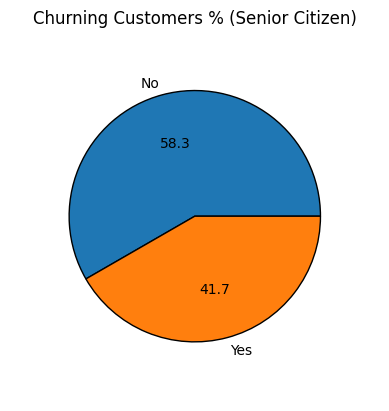

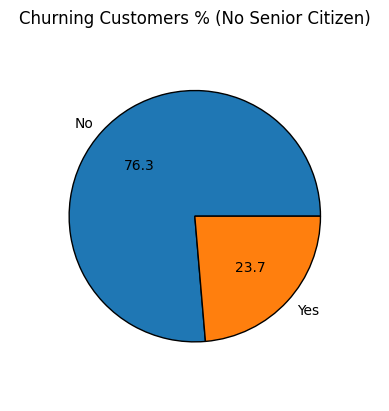

In [18]:
filter=df['SeniorCitizen']==1
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Senior Citizen)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['SeniorCitizen']==0
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Senior Citizen)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

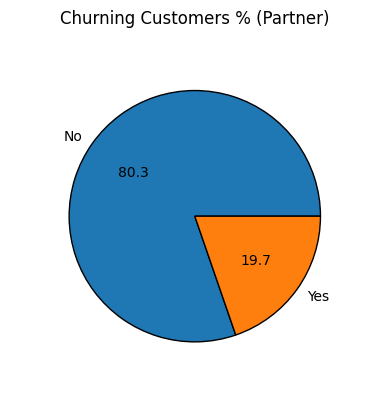

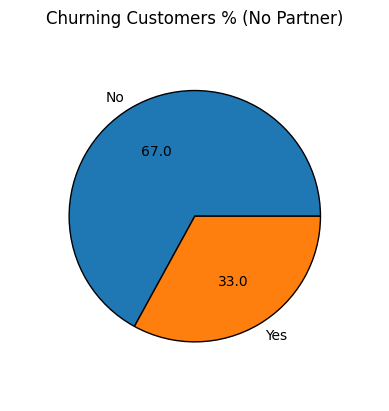

In [19]:
filter=df['Partner']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Partner)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['Partner']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Partner)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

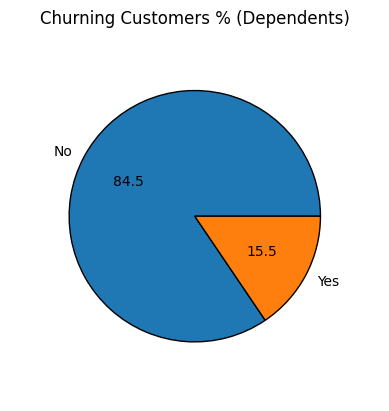

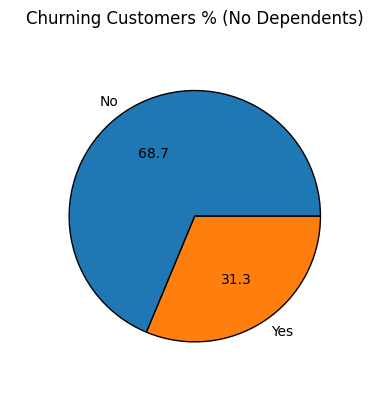

In [20]:
filter=df['Dependents']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Dependents)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['Dependents']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Dependents)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

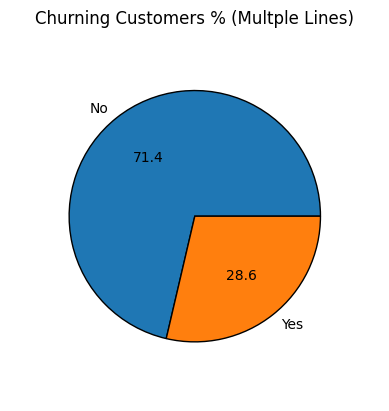

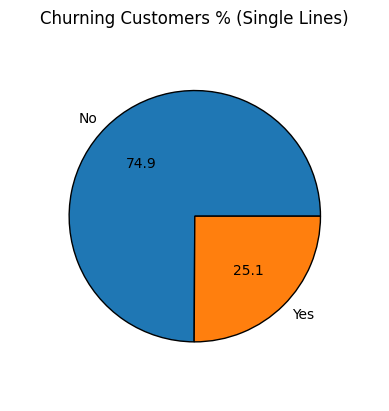

In [21]:
filter=df['MultipleLines']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Multple Lines)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['MultipleLines']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Single Lines)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

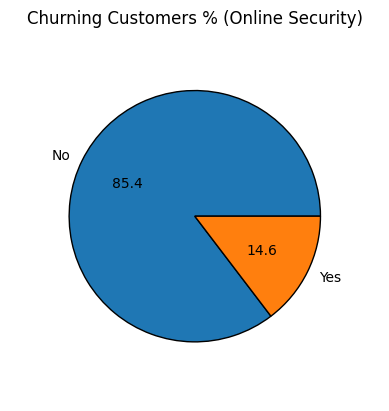

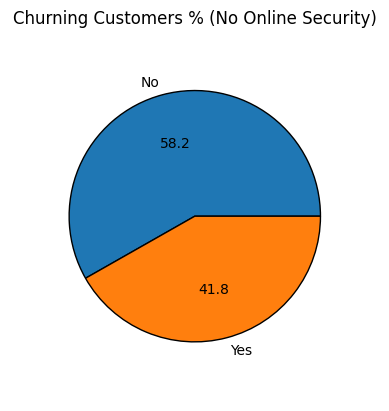

In [22]:
filter=df['OnlineSecurity']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Online Security)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['OnlineSecurity']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Online Security)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

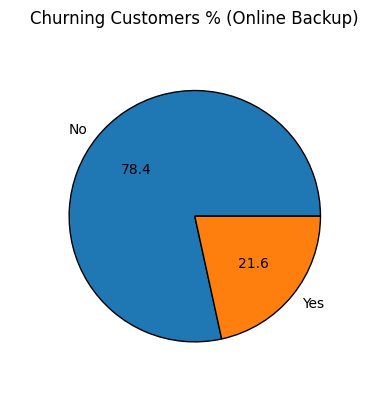

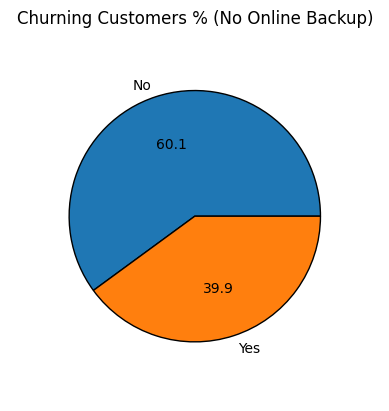

In [23]:
filter=df['OnlineBackup']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Online Backup)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['OnlineBackup']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Online Backup)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

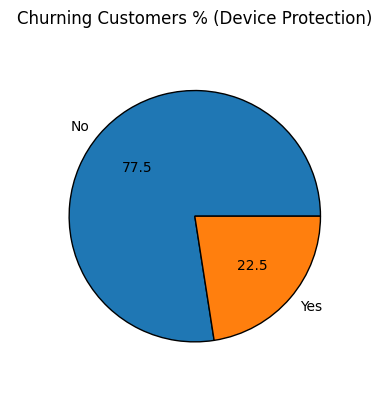

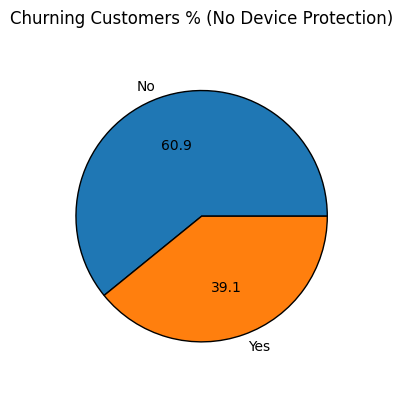

In [24]:
filter=df['DeviceProtection']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Device Protection)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['DeviceProtection']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Device Protection)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

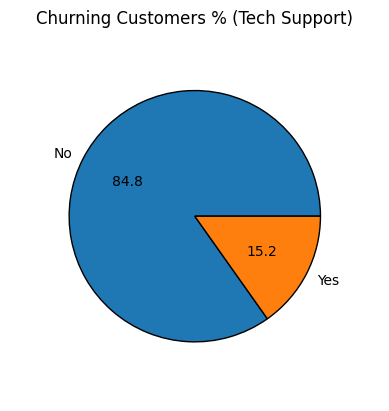

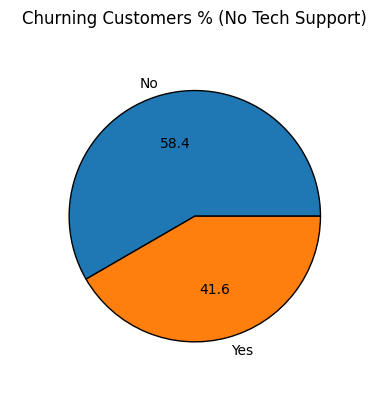

In [25]:
filter=df['TechSupport']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Tech Support)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['TechSupport']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Tech Support)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

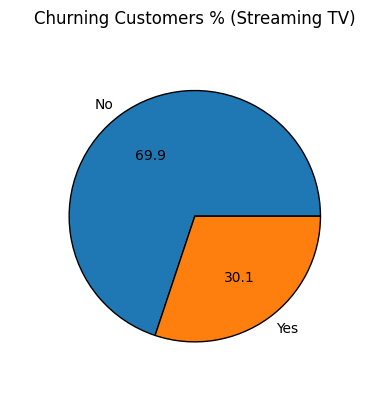

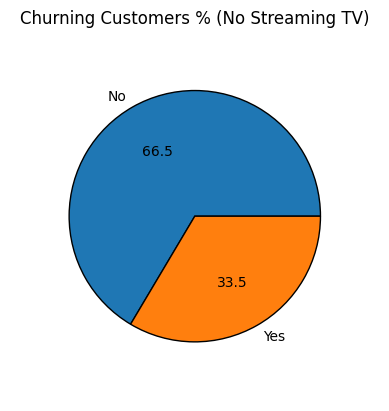

In [26]:
filter=df['StreamingTV']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Streaming TV)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['StreamingTV']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Streaming TV)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

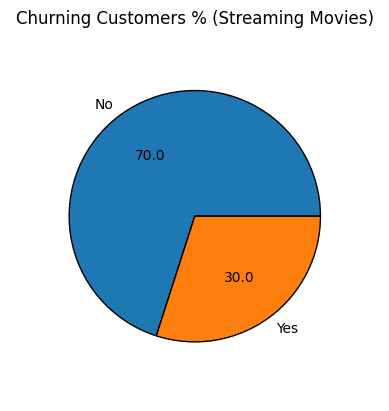

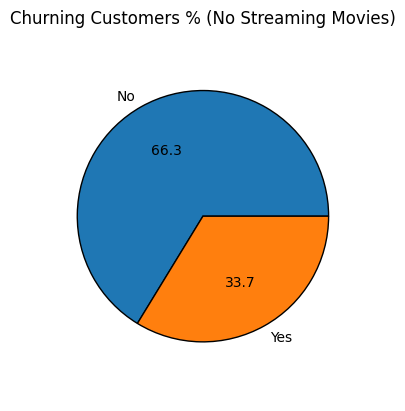

In [27]:
filter=df['StreamingMovies']=='Yes'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (Streaming Movies)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

filter=df['StreamingMovies']=='No'
pie_d=df.where(filter)
pie_d=pie_d['Churn'].value_counts()
pie_dc=pd.DataFrame(pie_d)
pie_1=pie_d.plot(kind='pie', labels=pie_d.index, title="Churning Customers % (No Streaming Movies)", radius=0.85, autopct='%1.1f', wedgeprops={'edgecolor': 'black'})
pie_1.yaxis.set_visible(False)
plt.show()

### Preparing Dataset

In [28]:
dummy1=pd.get_dummies(df["gender"])

In [68]:
dummy1

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [29]:
dummy1.drop(["Female"], axis=1, inplace=True)

In [30]:
df=pd.concat((df, dummy1), axis=1)

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male'],
      dtype='object')

In [32]:
df.drop(["gender"], axis=1, inplace=True)

In [33]:
df.rename(columns={"Male":"Gender"})

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [34]:
df=df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [35]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [36]:
dummy2 = pd.get_dummies(df[['Contract', 'PaymentMethod','MultipleLines','OnlineSecurity','StreamingTV','StreamingMovies','TechSupport','OnlineBackup','DeviceProtection','InternetService']], drop_first=False)

In [37]:
dummy2

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,1,1,0,0
7028,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7029,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7030,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [38]:
dummy2.drop(['Contract_Month-to-month', 'PaymentMethod_Bank transfer (automatic)','InternetService_DSL','MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1, inplace=True)

In [39]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,24,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,1
7028,2234-XADUH,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,0
7029,4801-JZAZL,0,1,1,11,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,0
7030,8361-LTMKD,1,1,0,4,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,1


In [40]:
df.drop(['Contract', 'PaymentMethod','StreamingTV','MultipleLines','OnlineSecurity','StreamingTV','StreamingMovies','TechSupport','OnlineBackup','DeviceProtection','InternetService'], axis=1, inplace=True)

In [42]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,1
7028,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,0
7029,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,0
7030,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,1


In [43]:
df=pd.concat((df, dummy2), axis=1)

In [44]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_Yes,TechSupport_No,TechSupport_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,1,0,0,1,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,1,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,1,0,0,1,1,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,1,1,0,0,1,0,0
7028,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,1,0,0,1,0,1,1,0
7029,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,1,0,1,0,1,0,1,0,0,0
7030,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,1,0,1,0,1,0,1,0,1,0


In [45]:
df.drop(['customerID'], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   Male                                   7032 non-null   uint8  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

### Checking Correlations in Dataset

In [47]:
corr_matrix = df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn                                    1.000000
OnlineSecurity_No                        0.342235
TechSupport_No                           0.336877
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
OnlineBackup_No                          0.267595
DeviceProtection_No                      0.252056
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingMovies_No                       0.130920
StreamingTV_No                           0.128435
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
Male                                    -0.008545
MultipleLines_No                        -0.032654
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307


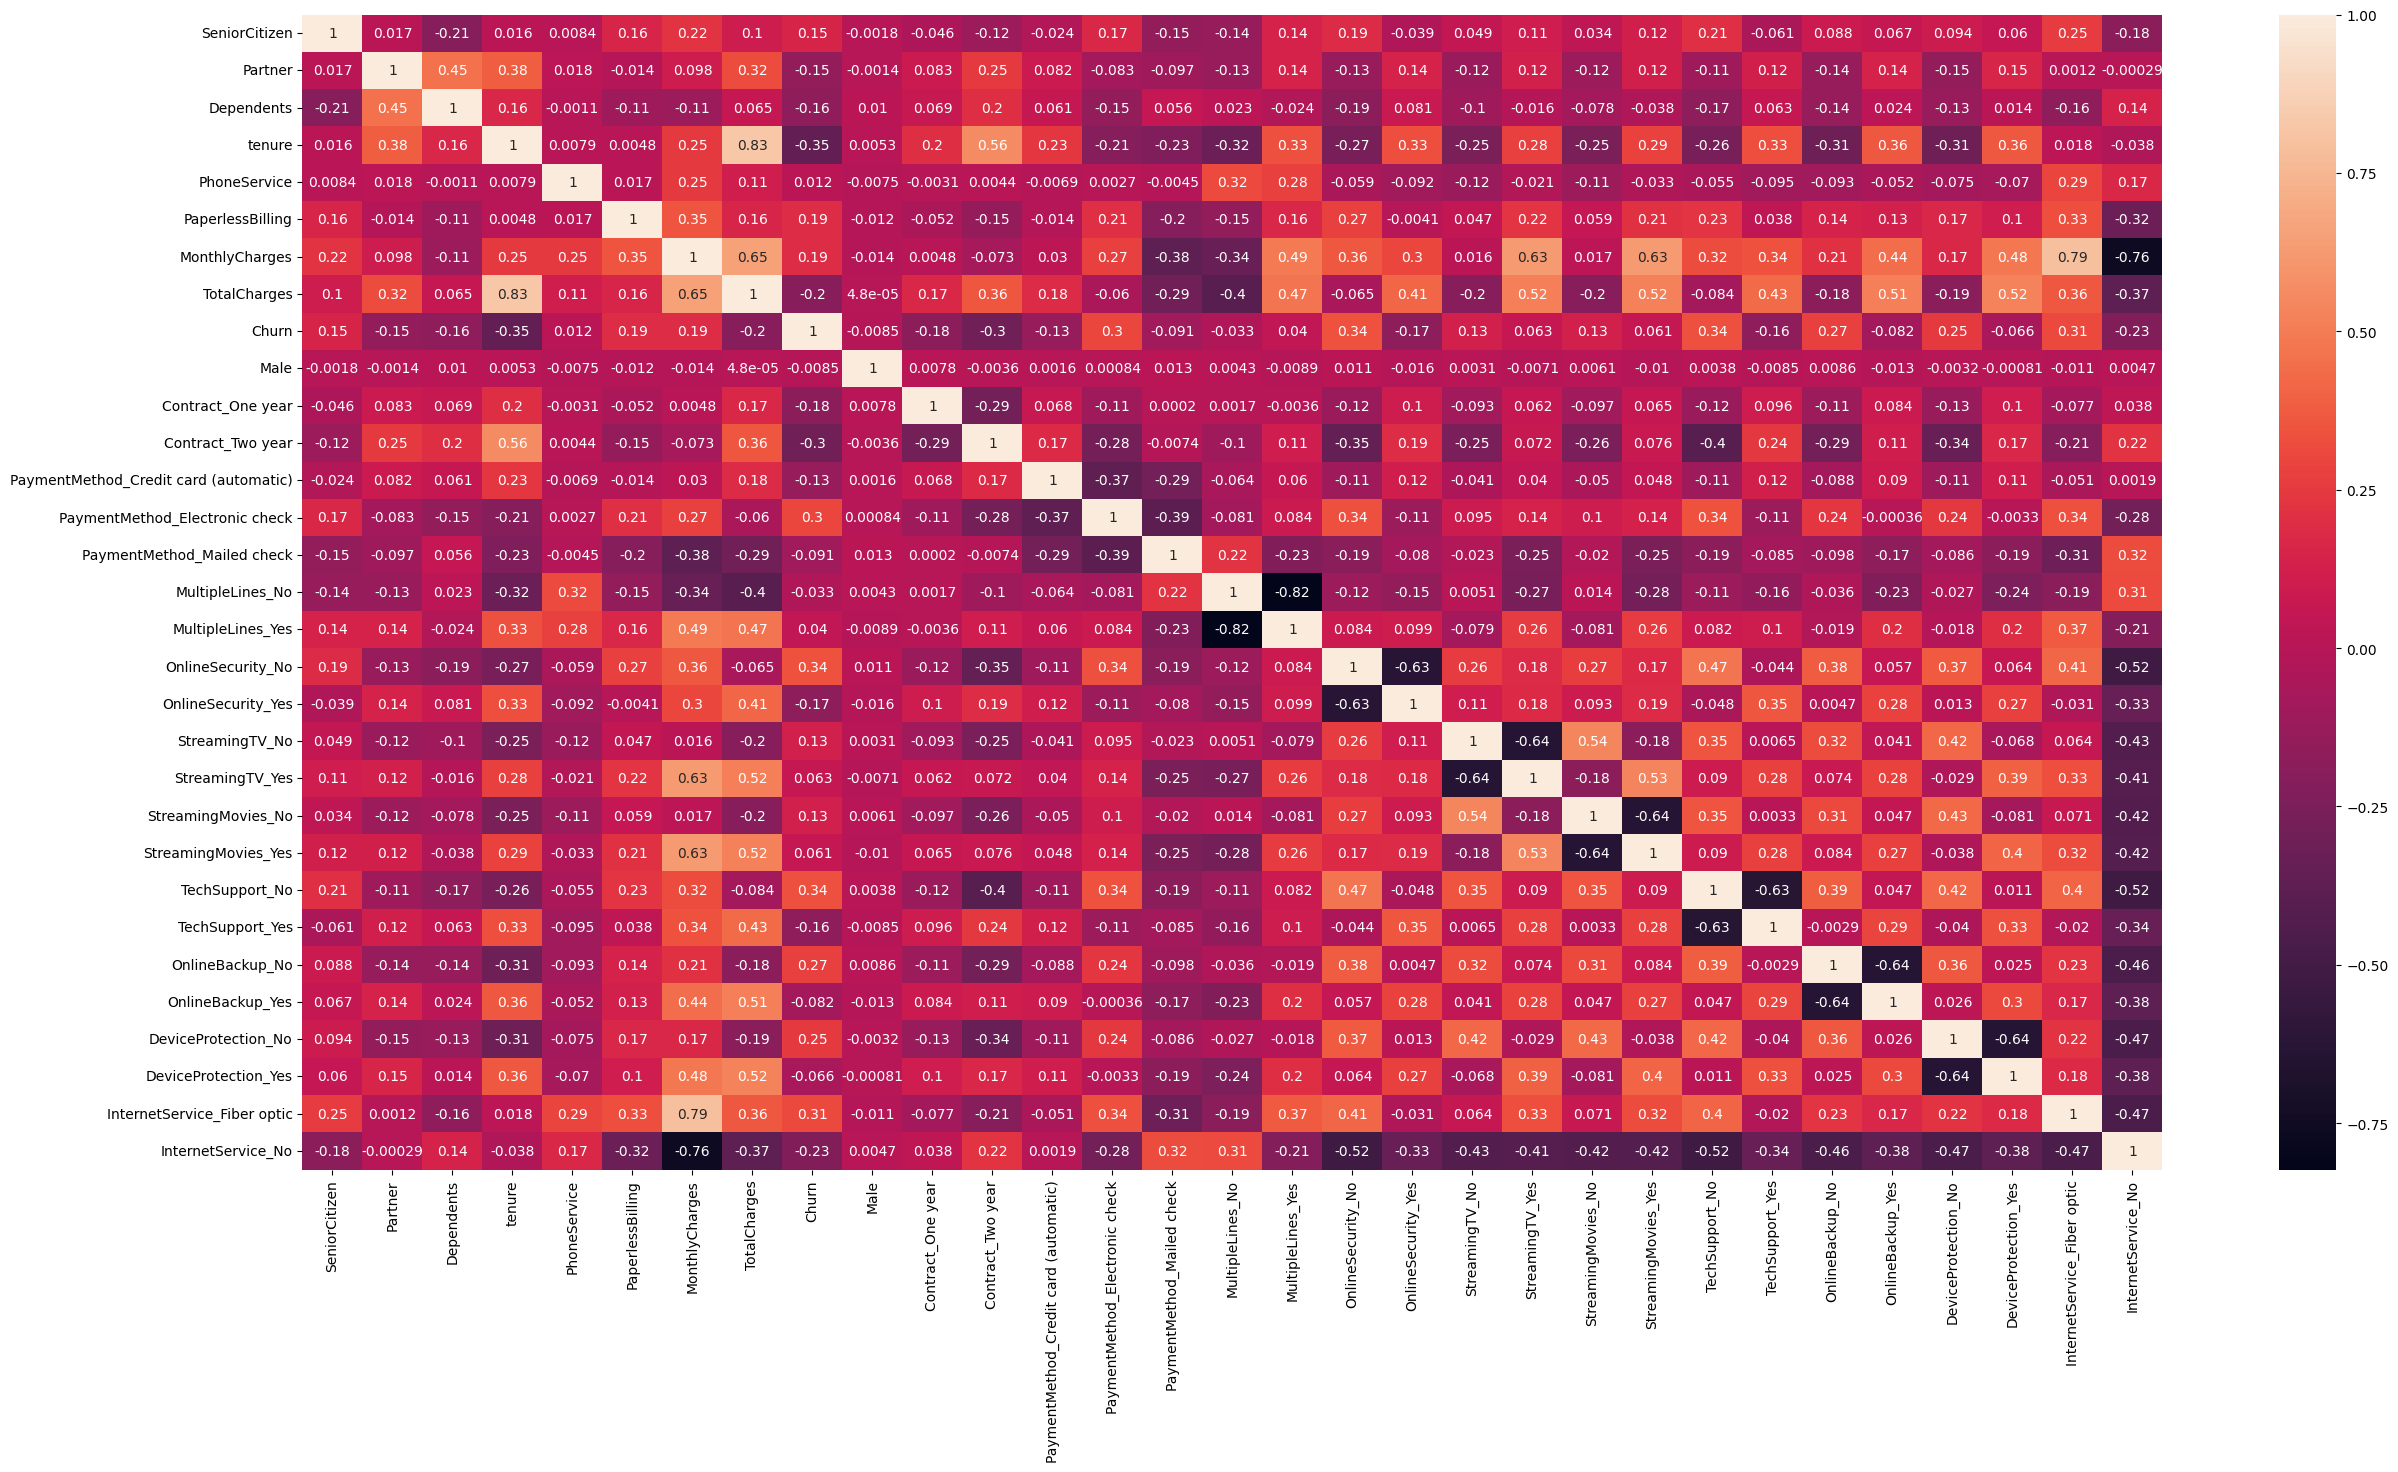

In [48]:
plt.figure(figsize = (30,15))       
sb.heatmap(df.corr(),annot = True)
plt.show()

In [49]:
df.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1, inplace=True)

C:\Users\SYED\AppData\Local\Temp\ipykernel_7940\3599098111.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',


### Feature Scalling Dataset

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
new_df=df
new_df[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
new_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,...,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,StreamingTV_Yes,StreamingMovies_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,...,1,0,1,0,0,0,0,1,0,0
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,...,1,0,1,0,0,0,1,0,0,0
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,...,0,0,1,0,0,1,0,1,0,0
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,-0.343137,1,1,0.664868,-0.129180,0,1,...,1,1,1,1,1,1,0,1,0,0
7028,0,1,1,1.612573,1,1,1.276493,2.241056,0,0,...,0,1,0,1,1,0,1,1,1,0
7029,0,1,1,-0.872808,0,1,-1.170004,-0.854514,0,0,...,0,0,1,0,0,0,0,0,0,0
7030,1,1,0,-1.158016,1,1,0.319168,-0.872095,1,1,...,1,1,0,0,0,0,0,0,1,0


In [51]:
newdf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,...,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,StreamingTV_Yes,StreamingMovies_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,...,1,0,1,0,0,0,0,1,0,0
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,...,1,0,1,0,0,0,1,0,0,0
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,...,0,0,1,0,0,1,0,1,0,0
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,-0.343137,1,1,0.664868,-0.129180,0,1,...,1,1,1,1,1,1,0,1,0,0
7028,0,1,1,1.612573,1,1,1.276493,2.241056,0,0,...,0,1,0,1,1,0,1,1,1,0
7029,0,1,1,-0.872808,0,1,-1.170004,-0.854514,0,0,...,0,0,1,0,0,0,0,0,0,0
7030,1,1,0,-1.158016,1,1,0.319168,-0.872095,1,1,...,1,1,0,0,0,0,0,0,1,0


### Train Test Splitting and Adding Constant to Dataset

In [52]:
from sklearn.model_selection import train_test_split
x=newdf.drop(['Churn'], axis=1)
y=newdf['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 26 Aug 2023   Deviance:                       4009.4
Time:                        18:14:32   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5197      0.190     -8.015      0.000      -1.891      -1.148
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1815      1.160     -1.880      0.060      -4.455       0.092
TotalCharges                              0.7328      0.198      3.705      0.000       0.345       1.120
Male                                     -0.0346      0.078     -0.442      0.658      -0.188       0.119
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
=========================================================================================================
"""

### Applying Logistic Regression on Dataset

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(x_train, y_train)
rfe.support_
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Male', False, 12),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('TechSupport_Yes', False, 5),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1)]

In [55]:
col = x_train.columns[rfe.support_]
x_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [56]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Sat, 26 Aug 2023   Deviance:                       4062.5
Time:                        18:14:34   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4288      0.158    -15.393      0.000      -2.738      -2.120
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
tenure                         -1.4736      0.184     -8.010      0.000      -1.834      -1.113
MonthlyCharges                 -1.1554      0.184     -6.279      0.000      -1.516      -0.795
TotalCharges                    0.6545      0.195      3.359      0.001       0.273       1.036
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
===============================================================================================
"""

### Predicting

In [57]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:20]

877     0.141849
5781    0.234950
6489    0.520938
878     0.498011
2779    0.651654
3867    0.319438
5378    0.492438
6614    0.776976
4457    0.179572
5355    0.547303
3017    0.190825
1247    0.582138
3488    0.692509
266     0.005539
2767    0.011653
242     0.070060
737     0.405811
4059    0.023001
3209    0.180826
2403    0.005095
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

In [59]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.141849,877
1,0,0.234950,5781
2,1,0.520938,6489
3,1,0.498011,878
4,1,0.651654,2779


In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.141849,877,0
1,0,0.234950,5781,0
2,1,0.520938,6489,1
3,1,0.498011,878,0
4,1,0.651654,2779,1


### Evaluating the Model

In [61]:
count=0
for x in range(4922):
    if(y_train_pred_final['Churn'][x]==y_train_pred_final['predicted'][x]):
        count=count+1
count

3951

In [62]:
success_rate=count/y_train_pred_final.index.size

In [63]:
success_rate

0.8027224705404307